## Verifcation number
<p> ref. https://youtu.be/sy3RBqeDNoY </p>
<p> github: https://github.com/ywchiu/largitdata/blob/master/code/Course_93.ipynb </p>

## data collection
<p> data source: https://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do </p>

In [1]:
import cv2
import requests

In [161]:
with open('img/kaptcha.jpg','wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

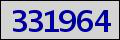

In [162]:
from PIL import Image
image = Image.open('img/kaptcha.jpg')
image

In [163]:
import PIL
import numpy
pil_image = PIL.Image.open('img/kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

In [164]:
#open_cv_image

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


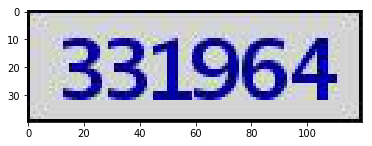

In [165]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [166]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [167]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [168]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w >= 15 and h == 24:
        ary.append((x,y,w,h))

(1, 1, 118, 38)
(12, 9, 16, 24)
(28, 9, 16, 24)
(44, 9, 16, 24)
(58, 9, 19, 24)
(63, 13, 9, 8)
(76, 9, 18, 24)
(81, 21, 8, 8)
(94, 9, 18, 24)
(98, 15, 6, 8)


In [169]:
print(ary)

[(12, 9, 16, 24), (28, 9, 16, 24), (44, 9, 16, 24), (58, 9, 19, 24), (76, 9, 18, 24), (94, 9, 18, 24)]


Populating the interactive namespace from numpy and matplotlib


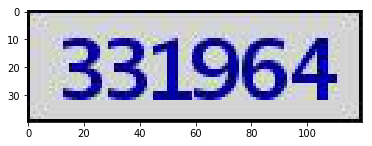

In [170]:
%pylab inline
plt.imshow(open_cv_image)

In [171]:
ary

[(12, 9, 16, 24),
 (28, 9, 16, 24),
 (44, 9, 16, 24),
 (58, 9, 19, 24),
 (76, 9, 18, 24),
 (94, 9, 18, 24)]

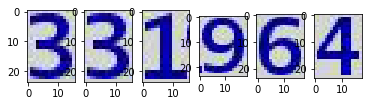

In [172]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

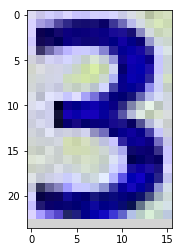

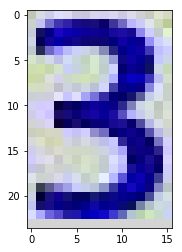

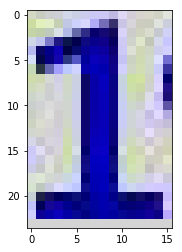

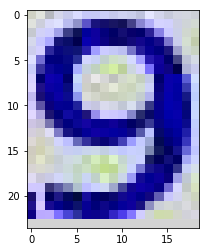

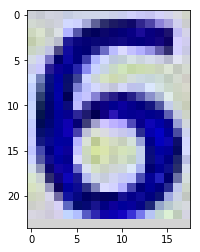

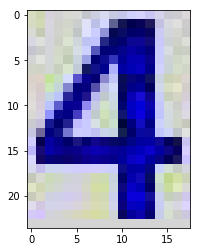

In [173]:
from matplotlib import pyplot as plt
import random

for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('img/sample/pic_{}_{}.jpg'.format(id+1,random.randint(100000, 999999)), dpi=100)

## building model

## MLP model

In [17]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import numpy as np

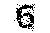

In [174]:
import PIL
import numpy
basewidth = 50
pil_image = PIL.Image.open('img/sample/6/pic_2_792513.jpg').convert('1')
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


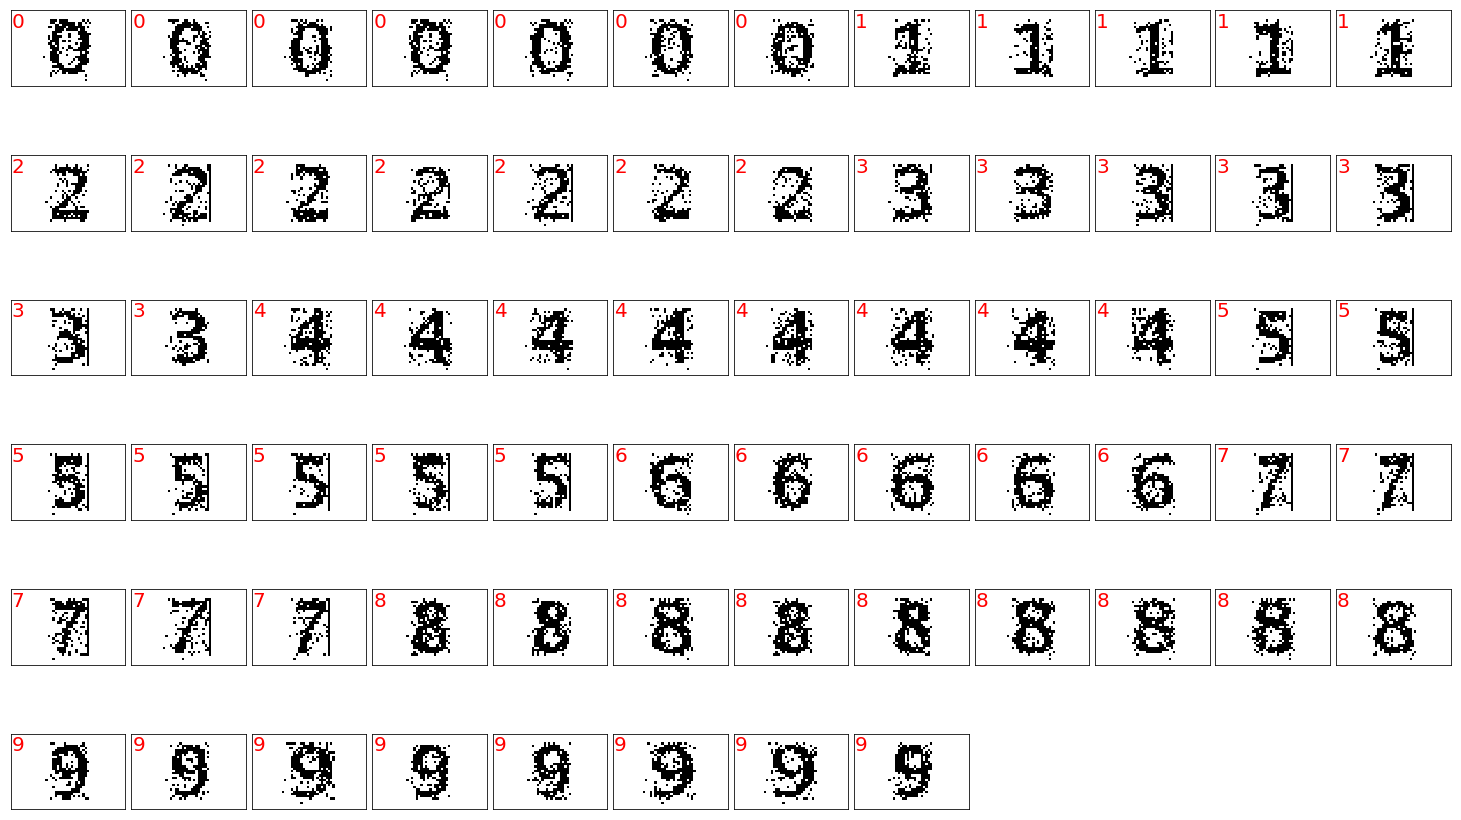

In [175]:
%pylab inline
import os
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(0,10):
    for img in os.listdir('img/sample/{}/'.format(i)):
        pil_image = PIL.Image.open('img/sample/{}/{}'.format(i, img)).convert('1')
        
        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
        
        ax = fig.add_subplot(10, 12, cnt+1, xticks=[], yticks=[])
        ax.imshow(img, cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(i), color="red", fontsize=20)
        cnt = cnt + 1
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [176]:
import numpy
digit_ary = numpy.array(digits)

In [177]:
digit_ary.shape

(68, 1650)

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [182]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter=2000)
mlp.fit(X_scaled, labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [183]:
predicted = mlp.predict(x_scaled)

In [184]:
target = numpy.array(labels)

In [185]:
predicted == target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [186]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9])

Populating the interactive namespace from numpy and matplotlib


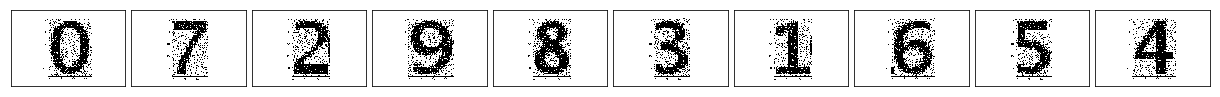

In [188]:
%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('img/sample/prediction/')):
    pil_image = PIL.Image.open('img/sample/prediction/{}'.format(img)).convert('1')
    ax = fig.add_subplot(10, 12, idx+1, xticks=[], yticks=[])
    ax.imshow(pil_image, cmap=plt.cm.binary, interpolation='nearest')

In [189]:
%pylab inline
import os
data = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for idx, img in enumerate(os.listdir('img/sample/prediction/')):
    pil_image = PIL.Image.open('img/sample/prediction/{}'.format(img)).convert('1')
    
    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])

Populating the interactive namespace from numpy and matplotlib


In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [192]:
mlp.predict(data_scaled)

array([0, 7, 2, 9, 8, 3, 1, 6, 5, 4])